In [3]:
import os

env_path = os.environ.get('VIRTUAL_ENV')
if env_path:
    print("Virtual Environment:", os.path.basename(env_path))
else:
    print("No virtual environment detected (or not set via VIRTUAL_ENV).")



Virtual Environment: .venv


In [20]:
# matlab:
# [x, fs] = audioread('cenicham_guitar.wav');
# X = stft(x, fs, 'Window', hamming(1024), fftLenght=1024, overlapLength=1024-128);
# sig = 10*log10(abs(X));

#ix = istft(x, fs, 'Window', hamming(1024), fftLenght=1024, overlapLength=1024-130);

# matlab metoda stft zahazuje posledni newindow lenght cast signalu!# matlab:
# [x, fs] = audioread('cenicham_guitar.wav');
# X = stft(x, fs, 'Window', hamming(1024), fftLenght=1024, overlapLength=1024-128);
# sig = 10*log10(abs(X));

#ix = istft(x, fs, 'Window', hamming(1024), fftLenght=1024, overlapLength=1024-130);

# matlab metoda stft zahazuje posledni newindow lenght cast signalu!
print('Ahoj svete!')

Ahoj svete!


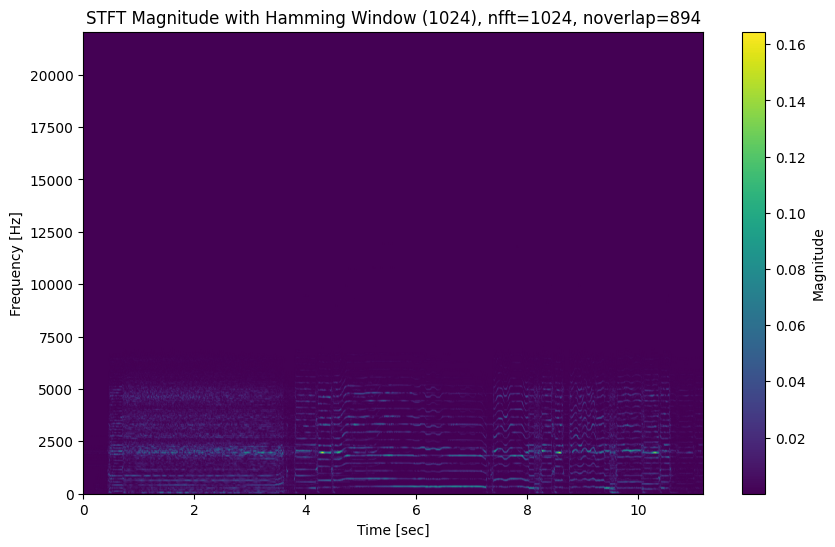

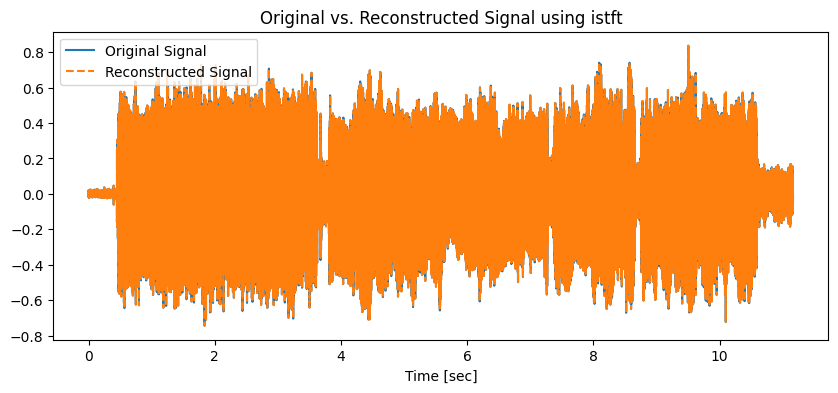

In [19]:
from scipy.signal import stft, istft
import numpy as np
import matplotlib.pyplot as plt
import torchaudio as ta

audio_path = './rock guitar.wav'

# Load audio; waveform is a tensor of shape [channels, samples]
waveform, sample_rate = ta.load(audio_path)
# Convert to numpy (assume mono: take first channel)
waveform_np = waveform.numpy()[0]

# Compute the duration in seconds
duration = waveform_np.shape[0] / sample_rate

# Create a time vector for the original signal
t = np.linspace(0, duration, waveform_np.shape[0], endpoint=False)

# Define STFT parameters
window = np.hamming(1024)    # Hamming window of length 1024
nperseg = 1024               # Each segment is 1024 samples long
noverlap = 1024 - 130        # Overlap length is 894 samples
nfft = 1024                  # FFT length is 1024

# Compute the STFT using the 1D waveform_np
f, t_stft, Zxx = stft(waveform_np, fs=sample_rate, window=window,
                      nperseg=nperseg, noverlap=noverlap, nfft=nfft)

# Plot the magnitude of the STFT
plt.figure(figsize=(10, 6))
plt.pcolormesh(t_stft, f, np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude with Hamming Window (1024), nfft=1024, noverlap=894')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Magnitude')
plt.show()

# Compute the inverse STFT to reconstruct the signal
t_recon, x_reconstructed = istft(Zxx, fs=sample_rate, window=window,
                                 nperseg=nperseg, noverlap=noverlap, nfft=nfft)
# Remove any extra dimensions (e.g., shape becomes (N,) instead of (1, N))
x_reconstructed = np.squeeze(x_reconstructed)

# Plot both the original and reconstructed signals for comparison
plt.figure(figsize=(10, 4))
plt.plot(t, waveform_np, label='Original Signal')
plt.plot(t_recon, x_reconstructed, linestyle='--', label='Reconstructed Signal')
plt.xlabel("Time [sec]")
plt.title("Original vs. Reconstructed Signal using istft")
plt.legend()
plt.show()
